# Project: TMDB movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project we are analyzing the data of TMDB movies.
we well answer some questions to know the properties of movies which are greatist and gets the most revenue.
- what genre is more popular?
- How many movies produced every year ?
- What is the proportion of all types of genres produced ? 
- what genres get more vote rate ?
- What genre gets more revenue? 
- what are the most profitable 10 production companies ?
- What are the top 10 movies with the most high revenue ?


In [3]:
#importing tools and libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
#Reading the csv file:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning 

### drop unnecessary columns :

In [7]:
#deleting useless columns :
df.drop(columns=['id','imdb_id','homepage','tagline','keywords','overview','release_date',],inplace=True)

In [8]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [9]:
df.shape

(10866, 14)

### drop nan values 

In [10]:
#Showing the missing data:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
#deleting the missing data:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
df.shape

(9773, 14)

In [18]:
df.revenue.describe()

count    9.773000e+03
mean     4.422678e+07
std      1.225834e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.104204e+07
max      2.781506e+09
Name: revenue, dtype: float64

### Treat zero budget as missing data

In [20]:
#showing rows with zero budget:
df[df.budget==0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015,0.0,2.700677e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,474,6.2,2015,0.0,2.056620e+07
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,81,5.5,2015,0.0,4.222338e+04
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0.0,0.000000e+00
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,1966,0.0,0.000000e+00
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.0,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.0,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.0,0.000000e+00


In [21]:
#deleting data with budget = 0:
df.drop(index =df[df.budget==0].index,axis=0,inplace = True )

In [22]:
df.shape

(5022, 14)

### calculate the profit and profit adj

In [23]:
#creating a new column contains the profits
df['profit'] = df.revenue - df.budget
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354


In [24]:
#creating a new column contains the profits considering the inflation:
df['profit_adj'] = df.revenue_adj - df.budget_adj
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08


#### get the main data of (genres , actor , production_company)

In [25]:
#splitting the genre data to get the main one
df.genres = df.genres.apply(lambda x:x.split('|')[0])
#splitting the cast column to get the main actor
df.cast = df.cast.apply(lambda x:x.split('|')[0])
#splitting the production companies column to get the main column :
df.production_companies = df.production_companies.apply(lambda x:x.split('|')[0])
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


### Showing duplicated rows :

In [26]:
df.duplicated().sum()

1

In [27]:
#Deleting duplicated rows:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : what genre is more popular?

In [29]:
#Showing the genres depending on their popularity :
round(df.groupby('genres').popularity.mean().sort_values(ascending=False).sort_index(),2)

genres
Action             1.21
Adventure          1.72
Animation          1.46
Comedy             0.80
Crime              0.94
Documentary        0.29
Drama              0.82
Family             1.36
Fantasy            1.35
History            1.18
Horror             0.67
Music              0.80
Mystery            0.89
Romance            1.22
Science Fiction    1.67
TV Movie           0.30
Thriller           0.99
War                1.36
Western            0.98
Name: popularity, dtype: float64

In [41]:
def barh_(labels_,y,x_label,y_label,title_):
    plt.figure(figsize=(10,8))
    plt.barh(labels_,y)
    plt.xlabel(x_label,fontsize=15)
    plt.ylabel(y_label,fontsize=15)
    plt.title(title_,fontsize=15)
    for i, value in enumerate(y):
        plt.text(value,i,str(value))
    plt.show()
    

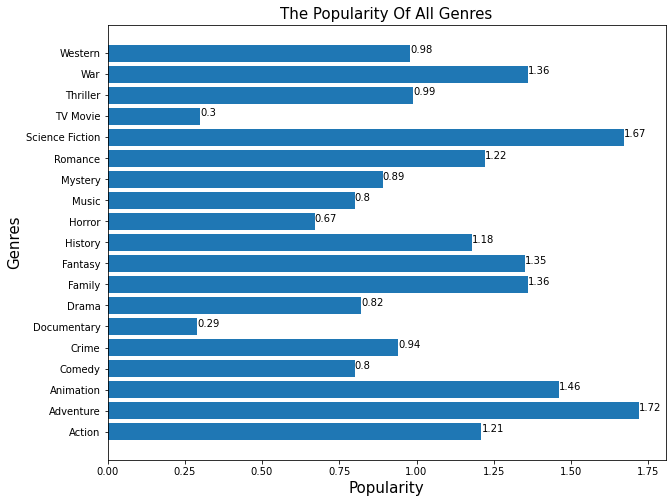

In [42]:
# df.groupby('genres').popularity.mean().sort_values(ascending=False).sort_index().plot(kind='bar',figsize = (10,8));
barh_(labels,round(df.groupby('genres').popularity.mean().sort_values(ascending=False).sort_index(),2),'Popularity','Genres','The Popularity Of All Genres')

> #### It looks that adventure movies are more popular than any genre 

### Research Question 2 : how many movies produced every year :

In [43]:
list_of_years = list(df.release_year.sort_values().unique())
number_of_movies = []

In [44]:
for year in list_of_years:
    number_of_movies.append(len(df[df.release_year==year]))
    

In [45]:
def line_plot(x,y):
    plt.figure(figsize=(15,8))
    plt.plot(x,y)
    plt.title('Number of movies produced each year',fontsize=15)
    plt.xticks(range(min(list_of_years),max(list_of_years)),rotation=90)
    plt.xlabel('Years',fontsize=15)
    plt.ylabel('Number of movies',fontsize=15)
    plt.show()

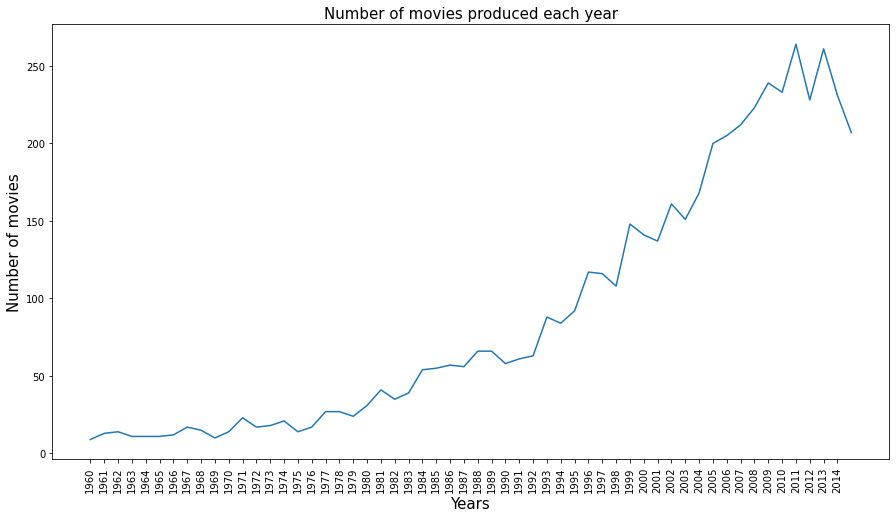

In [46]:
line_plot(list_of_years,number_of_movies)

> #### -This graph proves that the film industry is in continuous progress from the beginning until it reached its highest point in 2011.
  #### - It also explains that since 2011 the amount of films produced has decreased significantly

### Research Question 3 : What is the proportion of all types of genres produced:

In [47]:
df.genres.value_counts()
labels = list(df.genres.sort_values().unique())

In [48]:
labels

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [49]:
df.genres.value_counts().sort_index(ascending=True)

Action              896
Adventure           360
Animation           137
Comedy             1010
Crime               223
Documentary          36
Drama              1146
Family               50
Fantasy             137
History              22
Horror              436
Music                37
Mystery              53
Romance              80
Science Fiction     119
TV Movie              5
Thriller            225
War                  27
Western              22
Name: genres, dtype: int64

In [50]:
def pie_chart(x,labels_):
    plt.figure(figsize=(15,15))
    plt.pie(x,labels=labels_,autopct='%1.1f%%',labeldistance=1.2,pctdistance=1.4)
    plt.show()

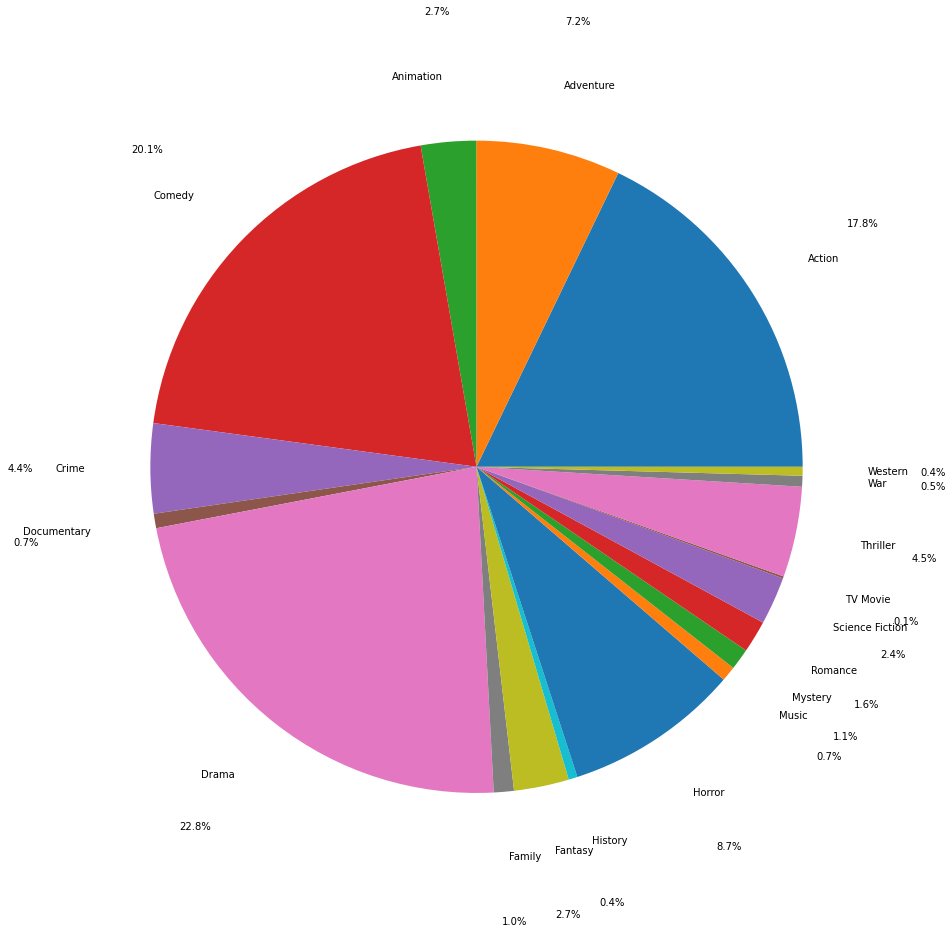

In [51]:
pie_chart(df.genres.value_counts().sort_index(ascending=True),labels)

> #### This pie chart proves that from 1960 to 2014 the most produced movies are Drama movies then comedy movies comes next and the third are the action movies

### Research Question 4 : what genres get more vote rate ?

In [52]:
round(df.groupby('genres').vote_average.mean().sort_index(ascending=True),2)

genres
Action             5.85
Adventure          6.16
Animation          6.34
Comedy             5.92
Crime              6.34
Documentary        6.72
Drama              6.36
Family             5.98
Fantasy            5.99
History            6.49
Horror             5.51
Music              6.21
Mystery            5.98
Romance            6.35
Science Fiction    6.10
TV Movie           4.38
Thriller           5.83
War                6.47
Western            6.13
Name: vote_average, dtype: float64

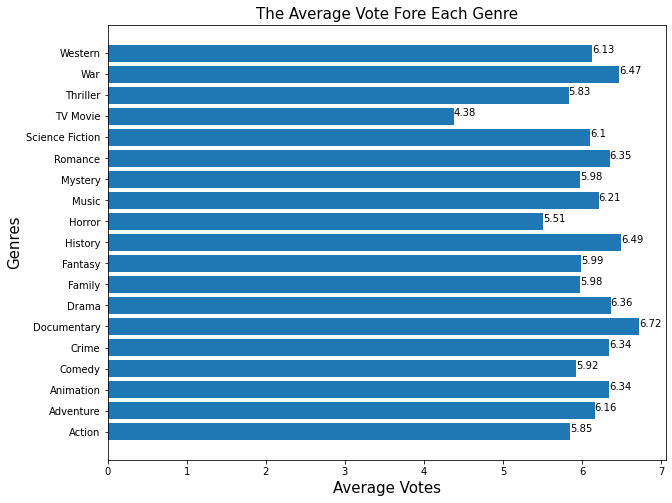

In [53]:
barh_(labels,round(df.groupby('genres').vote_average.mean().sort_index(ascending=True),2),'Average Votes','Genres','The Average Vote Fore Each Genre')

> #### People gives the higher vote to Documentary movies then History movie that means people interacts more with facts.

### Research Question 5 : What genre gets more revenue?

In [54]:
df.groupby('genres').revenue_adj.mean().sort_values(ascending=False)

genres
Adventure          2.651691e+08
Animation          2.220869e+08
Family             2.182729e+08
Science Fiction    1.788463e+08
Fantasy            1.559840e+08
History            1.298696e+08
Action             1.249618e+08
War                1.041314e+08
Romance            1.024992e+08
Music              1.007725e+08
Western            8.422045e+07
Comedy             7.833045e+07
Crime              7.546609e+07
Drama              7.059449e+07
Thriller           6.477540e+07
Mystery            5.942707e+07
Horror             4.956828e+07
Documentary        1.964230e+07
TV Movie           1.167782e+07
Name: revenue_adj, dtype: float64

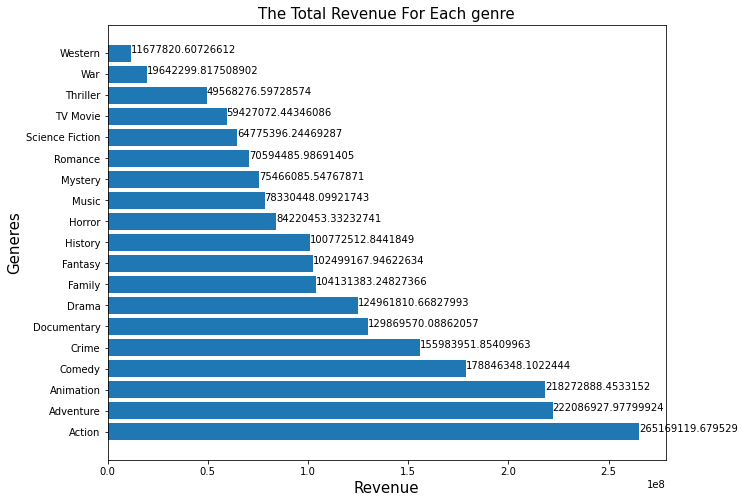

In [55]:
# df.groupby('genres').revenue_adj.mean().sort_values(ascending=False).plot(kind = 'bar',figsize=(8,8));
barh_(labels,df.groupby('genres').revenue_adj.mean().sort_values(ascending=False),'Revenue','Generes','The Total Revenue For Each genre')

> #### people like to see Avtion movies more than any genre 

### Research Question 6: what are the most profitable 10 production companies ?

In [56]:
df.groupby('production_companies').profit_adj.mean().sort_values(ascending=False)[:10].sort_index(ascending=True)

production_companies
1492 Pictures                     7.077521e+08
Barwood Films                     5.939132e+08
Cool Music                        8.289386e+08
Crossbow Productions              4.430539e+08
Eon Productions                   4.788929e+08
Lucasfilm                         8.721501e+08
MPH Entertainment                 4.409529e+08
Marvel Studios                    4.851672e+08
Patalex IV Productions Limited    8.328680e+08
Robert Wise Productions           1.072786e+09
Name: profit_adj, dtype: float64

In [57]:
company_10 = ['1492 Pictures','Barwood Films','Cool Music','Crossbow Productions','Eon Productions','Lucasfilm','MPH Entertainment','Marvel Studios','Patalex IV Productions Limited','Robert Wise Productions']

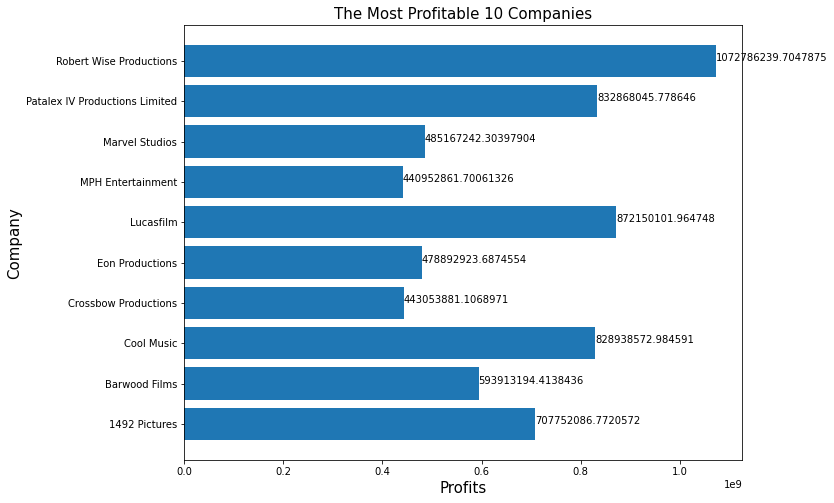

In [58]:
barh_(company_10,df.groupby('production_companies').profit_adj.mean().sort_values(ascending=False)[:10].sort_index(ascending=True),'Profits','Company','The Most Profitable 10 Companies')

> #### Ropert wise productions is the most successfull production company.

### The top 10 movies with the most high revenue:

In [59]:
df.groupby('original_title').revenue_adj.mean().sort_values(ascending=False)[:10]

original_title
Avatar                            2.827124e+09
Star Wars                         2.789712e+09
The Exorcist                      2.167325e+09
Jaws                              1.907006e+09
Star Wars: The Force Awakens      1.902723e+09
E.T. the Extra-Terrestrial        1.791694e+09
The Net                           1.583050e+09
One Hundred and One Dalmatians    1.574815e+09
The Empire Strikes Back           1.424626e+09
Jurassic World                    1.392446e+09
Name: revenue_adj, dtype: float64

In [60]:
movies_10 =['Avatar','Star Wars','The Exorcist','Jaws','Star Wars: The force Awakens','E.T. The Extra-Terrestrial','The Net','One Hundred And One Dalmatians','The Empire Strikes Back','Jurrassic World']

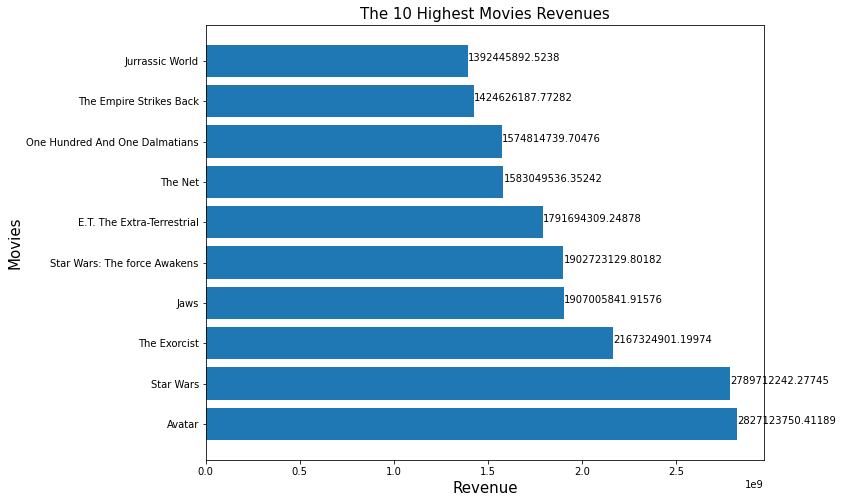

In [61]:
# df.groupby('original_title').revenue_adj.mean().sort_values(ascending=False)[:10].plot(kind = 'bar',figsize=(8,8));
barh_(movies_10,df.groupby('original_title').revenue_adj.mean().sort_values(ascending=False)[:10],'Revenue','Movies','The 10 Highest Movies Revenues')

> #### Avatar was the most attractive movie that gets the heighst revenue of all time. 

<a id='conclusions'></a>
## Conclusions

> In the first section I analyzed the popularity of all genres of movies to get the most popular genre of movies.

> In the second section I wanted to to show the progress made in the film industry by analizing the number of movies released every year, this analysis shows that the average of movies produced are decreased in the last few years so we must pay attention to improve it again.

> In the third section I wanted to get the proportion of the genres produced and found that the most produced genre of movies are dramatic ones.

> In the forth section I found that people gives the heighst votes for documentary movies and then the history one.

> In the fifth section I found that the action movies gets more revenue than any other genre.

> In the sixth section I found that the most successful production company for all times is Robert Wise Productions consedring the inflation. 

> Finally I found that 'Avatar' got the heighst revenue for all years consedring the inflation.

## Limitations
> Their were a lot of missinig data which so may be some movies gets high rates.
> 